
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> Introducción a la Bioinformática </h1>

<H2 align='center'> Tarea 1 </H2>
<div style="text-align:center;">
    <ul style="display:inline-block;">    
       <li>Giorgio Pellizari     rol: </li>
       <li>Juan Pablo Castillo rol: 201573534-4</li>
    </ul>
</div>
<hr style="height:2px;border:none"/>

In [103]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# random.seed(20)

bases = ['A', 'C', 'G', 'T', 'B', 'D']
mutations = ['insert', 'delete', 'replace']

In [126]:

def generateRandomSequence(bases, n = 200):
    sequence = []
    for i in range(n):
        b = random.choice(bases)
        sequence.append(b)
        
    return sequence

def randomMutation(sequence, bases, mutations):
    # Choose random mutation
    m = random.choice(mutations)
    position = random.randint(0, len(sequence)-1)
    aux_sequence = sequence.copy()
    if m == 'insert':
#         print(f'insert, position: {position}')
        b = random.choice(bases)
        aux_sequence = []
        j = 0
        for i in range(len(sequence) + 1):
            if i == position:
                aux_sequence.append(b)
            else:
                aux_sequence.append(sequence[j])
                j += 1
#         sequence = aux_sequence
            
    elif m == 'delete':
#         print(f'delete, position: {position}')
        del aux_sequence[position]
        
    elif m == 'replace':
#         print(f'replace, positon: {position}')
        eq_flag = True
        b = ''
        while eq_flag:
            b = random.choice(bases)
            if b != aux_sequence[position]:
                eq_flag = False
        
        aux_sequence[position] = b
            
    return aux_sequence
    
'''
The distance reflects the total number of single-character 
edits required to transform one word into another.
'''    
def levenshteinDistance(sequence_a, sequence_b):
    distances = np.zeros((len(sequence_a) + 1, len(sequence_b) + 1))
    
    for i in range(len(sequence_a) + 1):
        distances[i][0] = i
    
    for j in range(len(sequence_b) + 1):
        distances[0][j] = j
    
    a = 0
    b = 0
    c = 0
    
    for i in range(1, len(sequence_a) + 1):
        for j in range(1, len(sequence_b) + 1):
            if (sequence_a[i-1] == sequence_b[j-1]):
                distances[i][j] = distances[i - 1][j - 1]
            else:
                a = distances[i][j - 1]
                b = distances[i - 1][j]
                c = distances[i - 1][j - 1]
                
                if (a <= b and a <= c):
                    distances[i][j] = a + 1
                elif (b <= a and b <= c):
                    distances[i][j] = b + 1
                else:
                    distances[i][j] = c + 1

    return distances[len(sequence_a)][len(sequence_b)]
    
    
s1 = generateRandomSequence(bases)
s2 = generateRandomSequence(bases)
d = levenshteinDistance(s1, s2)
1 - d/len(s1)
# s_prim = randomMutation(s, bases, mutations)


0.345

>a) Generar una secuencia, y aplicar $M$ mutaciones; para $M$ entre 0 y 300, grafique la relación entre $M$ y $D$, donde $D$ es la distancia de Levenshtein entre la secuencia final y la secuencia inicial.

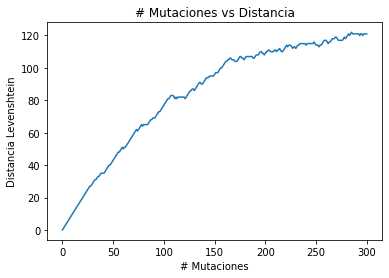

In [127]:
M = 300
D = []
sequence_i = generateRandomSequence(bases)
sequence_f = sequence_i.copy()
d = levenshteinDistance(sequence_i, sequence_f)
D.append(d)
for m in range(1, M+1):
    sequence_f = randomMutation(sequence_f, bases, mutations)
    d = levenshteinDistance(sequence_i, sequence_f)
    D.append(d)
    
plt.plot(range(M+1), D)
plt.title('# Mutaciones vs Distancia')
plt.xlabel('# Mutaciones')
plt.ylabel('Distancia Levenshtein')
plt.show()

>b) Genere una secuencia, clónela, y a cada copia aplíquele $M$ mutaciones (de modo que
tendrá dos secuencias crecientemente distintas). Grafique la relación entre $M$ y $D’$, donde $D’$
es la distancia entre las dos secuencias que están mutando.

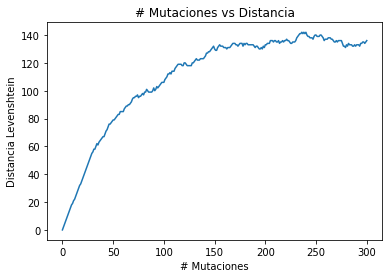

In [128]:
Dp = []
# Generate sequences
sequence_1 = generateRandomSequence(bases)
sequence_2 = sequence_1.copy()
d = levenshteinDistance(sequence_1, sequence_2)
Dp.append(d)
for m in range(1, M+1):
    sequence_1 = randomMutation(sequence_1, bases, mutations)
    sequence_2 = randomMutation(sequence_2, bases, mutations)
    d = levenshteinDistance(sequence_1, sequence_2)
    Dp.append(d)
    
plt.plot(range(M+1), Dp)
plt.title('# Mutaciones vs Distancia')
plt.xlabel('# Mutaciones')
plt.ylabel('Distancia Levenshtein')
plt.show()

>c) Genere 10.000 pares de secuencias (largo 200 c/u) y evalúe su distancia de Levenshtein;
haga un histograma de la distribución de estos valores, y calcule la media y .